# 1 Author

Student Name: Karsh Vashi

Student ID: 220655259


# 2 Problem formulation

The problem that has been intended to solve is to build a machine learning pipeline where on giving an audio file as input we predict the area in which the audio segment has been recorded out of the 6 locations used for data collection. It is very interesting problem as there is a scope to try and learn numerous different things in order to solve this

# 3 Machine Learning pipeline

The machine learning pipeline consists of:

*   Loading the MLEnd London Sounds dataset
*   Feature Extraction

*   Models Training

*   Model Evaluation and checking accuracy

# 4 Transformation stage

Instead of using the raw audio file as input to our machine learning model which would have not been suitable for our rather small dataset we will extract features from the signals and then use them.

Here, we have transformed the audio file into a number of different audio features using Mel-frequency cepstral coefficients (MFCCs). MFCCs are used for audio processing tasks and they can capture some of the characteristics of the sound that are specific to the location. Like the acoustic properties of a room or outdoor space can be captured by mfccs.

Note that the getXY() function takes the audio file as an input and returns these the 20 mfcc predictors and a binary label of indoor/outdoor as output for each audio file.

# 5 Modelling

The models we will build here have been chosen as all of them are supervised learning models which can be used for classification problems.

KNeighbors Classifier

Naive Bayes

Random Forest Classifier

Support Vector Machines

# 6 Methodology

First we will perform a train test split on X and y. After splitting predictors in X and label y into train and test datasets, we will fit the models on the training dataset. Then, we will predict the y using the models for both X-training and X-validation. 

The performance of each model is assessed through the training and validation accuracy. We will calculate and display both of them.

We can also normalise the predictors and then fit the model to see if the accuracy increases.

# 7 Dataset

The dataset we are using is MLEnd London Sounds dataset.The dataset contains information of the samples collected by the students. It has five attributes:

* Audio(file_id)

* area

* Spot

* Whether indoor or outdoor (in_out)

* Participant

In [14]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
sample_path2 = '/content/drive/MyDrive/Data1/MLEndLS_3/*.wav'
sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/*.wav'
files=[]

for i in range(1,6):
  sample_path = '/content/drive/MyDrive/Data1/MLEndLS_@/*.wav'.replace('@',str(i))
  files += glob.glob(sample_path)

  # print(len(files))
# sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/*.wav'

# files = glob.glob(sample_path)
# files = glob.glob(sample_path2)

len(files)
# type(files)

100

In [16]:
the_file = '/content/drive/MyDrive/Data1/MLEndLS_3/1007.wav'

This figure (100) corresponds to the number of **items** or **samples** in our dataset. Let's listen to some random audio files:

In [17]:
# for _ in range(5):
#   n = np.random.randint(98)
#   display(ipd.Audio(files[n]))

Can you recognise the filming spot? What can you say about the acoustic environment?

The MLEndLS Dataset is a collection of samples described by 5 attributes:
- Audio
- Area
- Spot
- Whether indoor or outdoor
- Participant

Upload the CSV file 'MLEndLS_Sample.csv'. Then run the next cell to load it into a Pandas DataFrame and print its contents.


In [18]:
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [19]:
MLENDLS_df['area'].value_counts()

campus        823
westend       666
british       404
Euston        234
southbank     229
kensington    144
Name: area, dtype: int64

The audio attribute is a complex one and cannot be directly inserted in a DataFrame structure. Instead, we have the name of the corresponding audio files, e.g. '3086.wav', which in our case are stored in the '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/' folder. 

The next cell prints the contents of the folder that stores our sample audio files. You can see that the names of the WAV files correspond to one of the `file_id` entries in the `MLEndLS_df` DataFrame.

In [20]:
for file in files:
  print(file.split('/')[-1])

1086.wav
1326.wav
2405.wav
0993.wav
0038.wav
3122.wav
0562.wav
1906.wav
1325.wav
2017.wav
0364.wav
1730.wav
3133.wav
2577.wav
3245.wav
1335.wav
2006.wav
1531.wav
1082.wav
2979.wav
2399.wav
3086.wav
0202.wav
1083.wav
2076.wav
1191.wav
1621.wav
0648.wav
1218.wav
0462.wav
1018.wav
1795.wav
1839.wav
1233.wav
0461.wav
0307.wav
0673.wav
0667.wav
2110.wav
2925.wav
2662.wav
1183.wav
2111.wav
3186.wav
1381.wav
0857.wav
3225.wav
2661.wav
0937.wav
2305.wav
0274.wav
0513.wav
2462.wav
3146.wav
3177.wav
2123.wav
0708.wav
2651.wav
0245.wav
2888.wav
2254.wav
2337.wav
0871.wav
0050.wav
0124.wav
2509.wav
1028.wav
1941.wav
0652.wav
1607.wav
2087.wav
2911.wav
3166.wav
1375.wav
3238.wav
0043.wav
1639.wav
1980.wav
1110.wav
0781.wav
0151.wav
2545.wav
1058.wav
1700.wav
2962.wav
3062.wav
3076.wav
2802.wav
2368.wav
0999.wav
2542.wav
0812.wav
0433.wav
1895.wav
2032.wav
1843.wav
0630.wav
3139.wav
2025.wav
2408.wav


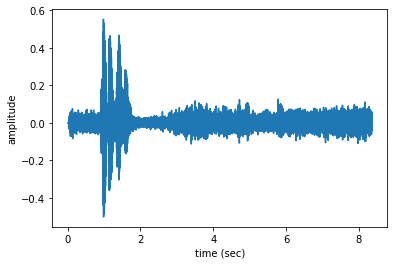

In [21]:
n=31
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

# 8 Results


## Feature extraction : Picth



In [22]:
# MLENDLS_df.loc[files[n].split('/')[-1]]

In [23]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 344862 samples


In [24]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [25]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [26]:
def getXy(files, labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    try:
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      yi = labels_file.loc[fileID]['area']

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      mfcc=librosa.feature.mfcc(x,fs)
      mfccs_scaled_features = np.mean(mfcc.T,axis=0)


      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
        
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      # xi = [power,pitch_mean,pitch_std,voiced_fr,mfccs_scaled_features]
      xi = mfccs_scaled_features

      X.append(xi)
      y.append(yi)


    
    except:
      print(file.split('/')[-1])

  return np.array(X),np.array(y)

In [27]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

  5%|▌         | 5/100 [00:07<02:26,  1.55s/it]

3122.wav


 12%|█▏        | 12/100 [00:15<01:34,  1.08s/it]

3133.wav
2577.wav
3245.wav


 19%|█▉        | 19/100 [00:18<00:57,  1.41it/s]

2979.wav


 21%|██        | 21/100 [00:19<00:47,  1.67it/s]

3086.wav


 39%|███▉      | 39/100 [00:34<00:51,  1.18it/s]

2925.wav
2662.wav


 43%|████▎     | 43/100 [00:36<00:38,  1.48it/s]

3186.wav


 46%|████▌     | 46/100 [00:38<00:37,  1.45it/s]

3225.wav
2661.wav


 53%|█████▎    | 53/100 [00:43<00:38,  1.23it/s]

3146.wav
3177.wav


 57%|█████▋    | 57/100 [00:45<00:24,  1.73it/s]

2651.wav


 59%|█████▉    | 59/100 [00:46<00:21,  1.87it/s]

2888.wav


 65%|██████▌   | 65/100 [00:50<00:27,  1.27it/s]

2509.wav


 71%|███████   | 71/100 [00:55<00:24,  1.20it/s]

2911.wav
3166.wav


 74%|███████▍  | 74/100 [00:56<00:15,  1.73it/s]

3238.wav


 81%|████████  | 81/100 [01:04<00:17,  1.08it/s]

2545.wav


 84%|████████▍ | 84/100 [01:06<00:12,  1.28it/s]

2962.wav
3062.wav
3076.wav
2802.wav


 90%|█████████ | 90/100 [01:08<00:05,  1.91it/s]

2542.wav


 97%|█████████▋| 97/100 [01:15<00:02,  1.05it/s]

3139.wav


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


In [28]:
# X1 = getX(files2, scale_audio=True, onlySingleDigit=True)


In [29]:
# X,y = X

In [30]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', np.unique(y))
print(X[0])


The shape of X is (74, 20)
The shape of y is (74,)
The labels vector is ['Euston' 'british' 'campus' 'kensington' 'southbank' 'westend']
[-146.68263    194.55028    -48.16905     43.638115   -14.096917
    3.5278378   23.44253    -11.204575     5.5433702   14.297447
   -7.7242284    9.26329    -12.42464      6.021298    -4.2262
    0.5740557    1.3689893   -5.3312936    9.123624    -5.1912556]


In [31]:
# from tensorflow.keras.utils import to_categorical
# y = to_categorical(y)
# y

In [32]:
# print(' The number of indoor recordings is ', np.count_nonzero(y))
# print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((51, 20), (23, 20), (51,), (23,))

In [34]:
# model  = svm.SVC(C=1)
# model.fit(X,y)

# yt_p = model.predict(X_train)
# yv_p = model.predict(X_val)
# # yv_1 = model.predict(X1)

# print('Training Accuracy', np.mean(yt_p==y_train))
# print('Validation  Accuracy', np.mean(yv_p==y_val))
# print('The support vectors are', model.support_vectors_.shape)

In [36]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import neighbors

for k in range(1,25,6):
  # classifier= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
  # classifier.fit(X_train, y_train)  
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  yt_p = knn.predict(X_train)
  yv_p = knn.predict(X_val)
  # yv_1 = model.predict(X1)

  print('Training Accuracy', np.mean(yt_p==y_train))
  print('Validation  Accuracy', np.mean(yv_p==y_val))
# print('The support vectors are', model.support_vectors_.shape)


Training Accuracy 1.0
Validation  Accuracy 0.21739130434782608
Training Accuracy 0.37254901960784315
Validation  Accuracy 0.30434782608695654
Training Accuracy 0.3137254901960784
Validation  Accuracy 0.30434782608695654
Training Accuracy 0.29411764705882354
Validation  Accuracy 0.391304347826087


In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)
# yv_1 = model.predict(X1)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.6666666666666666
Validation  Accuracy 0.17391304347826086


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

yt_p=clf.predict(X_train)
yv_p=clf.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))


Training Accuracy 1.0
Validation  Accuracy 0.2608695652173913


In [39]:
the_file = str('/content/drive/MyDrive/Data1/MLEndLS_1/0010.wav')

In [40]:
# def predict_io(the_file):
#   return model.predict(the_file)

# predict_io(ipd.Audio(the_file))
print(yt_p[:100])


['kensington' 'british' 'westend' 'westend' 'campus' 'westend' 'campus'
 'british' 'Euston' 'westend' 'southbank' 'southbank' 'westend' 'campus'
 'westend' 'westend' 'campus' 'british' 'westend' 'campus' 'Euston'
 'Euston' 'british' 'westend' 'campus' 'campus' 'british' 'southbank'
 'british' 'southbank' 'campus' 'campus' 'westend' 'british' 'westend'
 'Euston' 'westend' 'kensington' 'campus' 'Euston' 'westend' 'campus'
 'kensington' 'british' 'british' 'southbank' 'campus' 'westend' 'british'
 'british' 'campus']


Compare the training and validation accuracies. Is our model overfitting, underfitting, performing well? What do you think the accuracy of a random classifier would be?

Let's normalise the predictors, to see if the performance improves.


In [41]:
model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.34782608695652173


In [42]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

# model  = svm.SVC(C=1,gamma=2)
# model.fit(X_train,y_train)

# yt_p = classifier.predict(X_train)
# yv_p = classifier.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
# print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6666666666666666
Validation  Accuracy 0.17391304347826086


# 9 Conclusions

Here we used different models and it would be fair to say that using MFCCs for this purpose would likely require a large amount of training data from different locations, as well as a very well-designed machine learning model. Additiionally, there are likely other factors that could affect the accuracy of such a prediction, such as the microphone quality of different smartphones used to make the recording and any background noise that may be present. 